In [1]:
import torch
from torch.autograd import Variable
import torch.utils.data as Data
import torchvision
import matplotlib.pyplot as plt
import torch.nn as nn
%matplotlib inline

# Mnist Dataset

In [3]:
train_data = torchvision.datasets.MNIST(
    root='../mnist',
    train=True,                                   # training data
    transform=torchvision.transforms.ToTensor(),  # transform to torch.FloatTensor and normalize 
    download=False                                # if you don't have dataset,it should be true
)
type(train_data)

torchvision.datasets.mnist.MNIST

In [4]:
print train_data.train_data.size()
print train_data.train_labels.size()

torch.Size([60000, 28, 28])
torch.Size([60000])


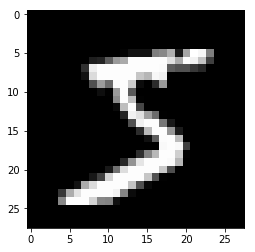

In [5]:
plt.imshow(train_data.train_data[0].numpy(), cmap='gray')

In [7]:
test_data = torchvision.datasets.MNIST(
    root='../mnist', 
    train=False, 
    transform=torchvision.transforms.ToTensor()
)

In [8]:
test_x = Variable(
    torch.unsqueeze(test_data.test_data, dim=1),
                  volatile=True
)[:2000].type(torch.FloatTensor) /255.
print type(test_x)
print test_x.size()
test_y = test_data.test_labels[:2000].type(torch.LongTensor)

<class 'torch.autograd.variable.Variable'>
torch.Size([2000, 1, 28, 28])


In [9]:
from CNN_Define import CNN
cnn = CNN()
print cnn

CNN (
  (conv1): Sequential (
    (0): Conv2d(1, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU ()
    (2): MaxPool2d (size=(2, 2), stride=(2, 2), dilation=(1, 1))
  )
  (conv2): Sequential (
    (0): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU ()
    (2): MaxPool2d (size=(2, 2), stride=(2, 2), dilation=(1, 1))
  )
  (out): Linear (1568 -> 10)
)


In [10]:
EPOCH = 1
BATCH_SIZE = 50
LR = 0.001

In [11]:
train_loader = Data.DataLoader(dataset=train_data, batch_size=BATCH_SIZE, shuffle=True)

In [12]:
optimizer = torch.optim.Adam(cnn.parameters(), lr=LR)
loss_func = nn.CrossEntropyLoss()

In [15]:
for epoch in xrange(EPOCH):
    for step, (x,y) in enumerate(train_loader):
        b_x = Variable(x)
        b_y = Variable(y)
        
        output = cnn(b_x)
        loss = loss_func(output, b_y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if step%50 == 0:
            test_output = cnn(test_x)
            pred_y = torch.max(test_output, dim=1)[1].data.squeeze()
            accuracy = sum(pred_y == test_y) / float(test_y.size(0))
            print(
                'step:',step,
                '| train loss: %.4f' % loss.data[0],
                '| test_acc: %.2f' % accuracy)

('step:', 0, '| train loss: 1.9682', '| test_acc: 0.53')
('step:', 50, '| train loss: 0.7795', '| test_acc: 0.78')
('step:', 100, '| train loss: 0.3012', '| test_acc: 0.86')
('step:', 150, '| train loss: 0.3146', '| test_acc: 0.88')
('step:', 200, '| train loss: 0.2253', '| test_acc: 0.91')
('step:', 250, '| train loss: 0.0837', '| test_acc: 0.92')
('step:', 300, '| train loss: 0.0836', '| test_acc: 0.92')
('step:', 350, '| train loss: 0.1349', '| test_acc: 0.93')
('step:', 400, '| train loss: 0.1847', '| test_acc: 0.94')
('step:', 450, '| train loss: 0.2418', '| test_acc: 0.95')
('step:', 500, '| train loss: 0.1934', '| test_acc: 0.94')
('step:', 550, '| train loss: 0.1080', '| test_acc: 0.95')
('step:', 600, '| train loss: 0.0984', '| test_acc: 0.95')
('step:', 650, '| train loss: 0.0496', '| test_acc: 0.96')
('step:', 700, '| train loss: 0.1550', '| test_acc: 0.96')
('step:', 750, '| train loss: 0.2932', '| test_acc: 0.96')
('step:', 800, '| train loss: 0.0267', '| test_acc: 0.97')
